In [ ]:
import pandas as pd
import re
import string
import numpy as np
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [ ]:
data = pd.read_csv("/email_dataset.csv",encoding = "'latin'")

In [ ]:
data.head()

,text,label
0,subject christmas tree farm pictures,ham
1,subject leadership development pilot sally tim...,ham
2,subject key dates impact upcoming sap implemen...,ham
3,subject key hr issues going forward year end r...,ham
4,subject quasi good morning love go get coffee ...,ham


In [ ]:
data["text"] = data.text
data["label"] = data.label

In [ ]:
# Randomize the dataset
data = data.sample(frac=1, random_state=42)

In [ ]:
data.head()

,text,label
13235,subject buy cheap viagra us hi new offer buy c...,spam
3595,subject plant outage affecting meter 8291 enro...,ham
5553,subject schedule crawler mailing list please r...,ham
10084,subject start date 1 10 02 hourahead hour 15 s...,ham
13172,subject free ltci policy comparison software l...,spam


# Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
emails_train, emails_test, target_train, target_test = train_test_split(data.text,data.label,test_size = 0.2)

In [ ]:
# Split data into train, validation, and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data.text, data.label, test_size=0.3, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.3, random_state=42)

In [ ]:
data.info

<bound method DataFrame.info of                                                     text label
13235  subject buy cheap viagra us hi new offer buy c...  spam
3595   subject plant outage affecting meter 8291 enro...   ham
5553   subject schedule crawler mailing list please r...   ham
10084  subject start date 1 10 02 hourahead hour 15 s...   ham
13172  subject free ltci policy comparison software l...  spam
...                                                  ...   ...
21575  subject online pharmaxz want inexpensive pain ...  spam
5390   subject competitive analysis update us terrori...   ham
860    subject pathing procedures buybacks path buyba...   ham
15795  subject new product cialis soft tabs hi new pr...  spam
23654  subject stockalert investors need know get can...  spam

[27859 rows x 2 columns]>

In [ ]:
emails_train.shape

(22287,)

In [ ]:
train_data.shape

(13650,)

# Preprocessing

In [ ]:
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)

def to_lower(word):
    result = word.lower()
    return result

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n','')

def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

x_train = [clean_up_pipeline(o) for o in train_data]
x_test = [clean_up_pipeline(o) for o in test_data]
x_val = [clean_up_pipeline(o) for o in val_data]
x_train[0]

'subject enjoy generic viagra cheap prices places charge  charge  quite difference huh amazing erection within several seconds guaranteed go sexual overdrive today vroooom shipped worldwide easy use solution http www wwwbargins biz via oxygen link people dislike adv http www wwwbargins biz html'

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_y = le.fit_transform(train_labels.values)
test_y = le.transform(test_labels.values)
val_y = le.transform(val_labels.values)

In [ ]:
train_y
test_y
val_y

array([0, 0, 1, ..., 0, 1, 1])

# Tokenize

In [ ]:
## some config values
embed_size = 100 # how big is each word vector
max_feature = 50000 # how many unique words to use (i.e num rows in embedding vector)
max_len = 2000 # max number of words in a question to use

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_feature)

tokenizer.fit_on_texts(x_train)

x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
x_test_features = np.array(tokenizer.texts_to_sequences(x_test))
x_val_features = np.array(tokenizer.texts_to_sequences(x_val))
x_train_features[0]

<ipython-input-16-49dd7d254750>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
<ipython-input-16-49dd7d254750>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test_features = np.array(tokenizer.texts_to_sequences(x_test))
<ipython-input-16-49dd7d254750>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dt

[2,
 1509,
 1029,
 409,
 906,
 95,
 2477,
 614,
 614,
 2033,
 2057,
 16202,
 2627,
 4593,
 59,
 401,
 3129,
 962,
 72,
 1512,
 20106,
 68,
 20107,
 2160,
 659,
 513,
 81,
 1133,
 17,
 39,
 26995,
 1013,
 528,
 9988,
 272,
 99,
 7678,
 8770,
 17,
 39,
 26995,
 1013,
 524]

# Padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train_features = pad_sequences(x_train_features,maxlen=max_len)
x_test_features = pad_sequences(x_test_features,maxlen=max_len)
x_val_features = pad_sequences(x_val_features,maxlen=max_len)
x_train_features[0]

array([    0,     0,     0, ..., 26995,  1013,   524], dtype=int32)

In [ ]:
train_y1 = train_y.reshape(-1, 1)
test_y1 = test_y.reshape(-1, 1)
val_y1 = val_y.reshape(-1, 1)

# Model

In [ ]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional
from keras.models import Model

In [ ]:
import tensorflow as tf
from keras.layers import BatchNormalization
# Custom Bidirectional LSTM
class CustomBidirectionalLSTM(tf.keras.layers.Layer):
    def __init__(self, units, return_sequences=True):
        super(CustomBidirectionalLSTM, self).__init__()
        self.units = units
        self.return_sequences = return_sequences

    def build(self, input_shape):
        self.lstm_fw = tf.keras.layers.LSTM(self.units, return_sequences=self.return_sequences)
        self.lstm_bw = tf.keras.layers.LSTM(self.units, return_sequences=self.return_sequences, go_backwards=True)
        self.concat_layer = tf.keras.layers.Concatenate(axis=-1)

    def call(self, inputs):
        lstm_fw_out = self.lstm_fw(inputs)
        lstm_bw_out = self.lstm_bw(inputs)
        output = self.concat_layer([lstm_fw_out, lstm_bw_out])
        return output


In [ ]:
pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.6 MB/s eta 0:00:00


In [ ]:
import nlpaug.augmenter.word as naw
import tensorflow as tf
# Function to apply text augmentation using synonym replacement
def augment_text(sentence, aug_p=0.2):
    aug = naw.SynonymAug(aug_p=aug_p)
    augmented_text = aug.augment(sentence)
    return augmented_text

# Augment the training data with text variations
augmented_x_train = [augment_text(sentence) for sentence in x_train]

# Print the length of the original training data
print("Original training data length:", len(x_train))

# Print the length of the augmented training data
print("Augmented training data length:", len(augmented_x_train))

# Combine original and augmented data
x_train_combined = x_train + augmented_x_train
train_y_combined = np.concatenate((train_y1, train_y1))

# Print the length of the combined training data
print("Combined training data length:", len(x_train_combined))

# Tokenize the combined data
x_train_combined_seq = tokenizer.texts_to_sequences(x_train_combined)

# Pad the sequences
x_train_combined_padded = pad_sequences(x_train_combined_seq, maxlen=max_len)

# Build the model with data augmentation
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(max_feature, embed_size, input_length=max_len))
model1.add(CustomBidirectionalLSTM(32))
model1.add(BatchNormalization())
model1.add(tf.keras.layers.Dense(8, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.4))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

Original training data length: 13650
Augmented training data length: 13650
Combined training data length: 27300
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2000, 100)         5000000   
                                                                 
 custom_bidirectional_lstm_1  (None, 2000, 64)         34048     
  (CustomBidirectionalLSTM)                                      
                                                                 
 batch_normalization_1 (Batc  (None, 2000, 64)         256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 2000, 8)           520       
                                                                 
 dropout_1 (Dropout)         (None, 2000, 8)           0         
        

Epoch 1/20
54/54 [==============================] - 19s 348ms/step - loss: 0.3571 - accuracy: 0.7664 - val_loss: 0.0559 - val_accuracy: 0.9851
Epoch 2/20
54/54 [==============================] - 20s 361ms/step - loss: 0.3568 - accuracy: 0.7665 - val_loss: 0.0621 - val_accuracy: 0.9843
Epoch 3/20
54/54 [==============================] - 18s 336ms/step - loss: 0.3568 - accuracy: 0.7661 - val_loss: 0.0604 - val_accuracy: 0.9852
Epoch 4/20
54/54 [==============================] - 19s 346ms/step - loss: 0.3566 - accuracy: 0.7665 - val_loss: 0.0630 - val_accuracy: 0.9847
Epoch 5/20
54/54 [==============================] - 18s 339ms/step - loss: 0.3564 - accuracy: 0.7663 - val_loss: 0.0661 - val_accuracy: 0.9851
Epoch 6/20
54/54 [==============================] - 19s 346ms/step - loss: 0.3563 - accuracy: 0.7667 - val_loss: 0.0683 - val_accuracy: 0.9852
Epoch 7/20
54/54 [==============================] - 19s 353ms/step - loss: 0.3563 - accuracy: 0.7665 - val_loss: 0.0700 - val_accuracy: 0.9837

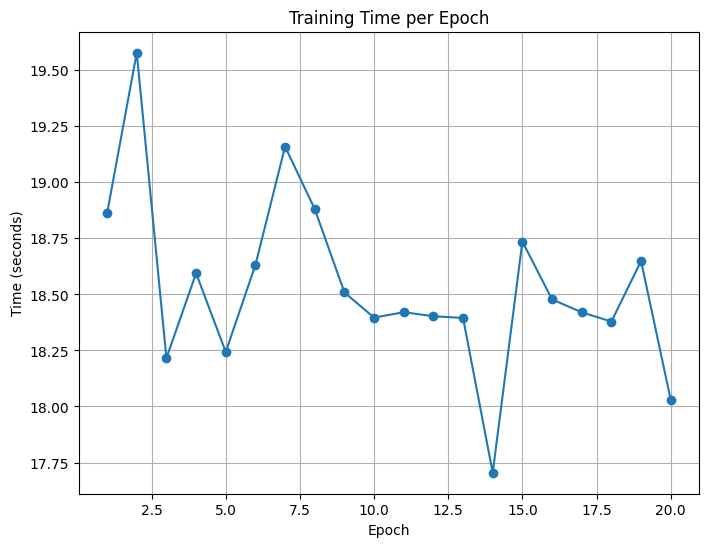

In [ ]:
import matplotlib.pyplot as plt
import time
from keras.callbacks import Callback

# Custom callback to record training times after each epoch
class TrainingTimeCallback(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        elapsed_time = time.time() - self.start_time
        self.training_times.append(elapsed_time)
        print(f"Epoch {epoch + 1} - Training time: {elapsed_time:.2f} seconds")

    def on_train_begin(self, logs=None):
        self.training_times = []

# Create an instance of the custom callback
training_time_callback = TrainingTimeCallback()
# Train the model with augmented data using the custom callback
history1 = model1.fit(x_train_combined_padded,
                      train_y_combined,
                      batch_size=512,
                      epochs=20,
                      validation_data=(x_val_features, val_y1),
                      callbacks=[training_time_callback])

# Plot the training times after each epoch as a line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), training_time_callback.training_times, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.title('Training Time per Epoch')
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model1.evaluate(x_test_features, test_y1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

262/262 [==============================] - 11s 37ms/step - loss: 0.6933 - accuracy: 0.4448
Test Loss: 0.6932608485221863
Test Accuracy: 0.44476351141929626


In [ ]:
def calculate_confusion_matrix(actual, predicted):
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for a, p in zip(actual, predicted):
        if a == 1 and p == 1:
            tp += 1
        elif a == 0 and p == 0:
            tn += 1
        elif a == 0 and p == 1:
            fp += 1
        elif a == 1 and p == 0:
            fn += 1

    confusion_matrix = [[tp, fp], [fn, tn]]
    return confusion_matrix

# Make predictions using the trained model
test_predictions = model1.predict(x_test_features)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Convert the predictions to a 1D array
test_predictions_flattened = test_predictions.flatten()

# Convert the actual labels to a 1D array
test_y1_flattened = test_y1.flatten()
# Calculate confusion matrix
confusion_mat = calculate_confusion_matrix(test_y1_flattened, test_predictions_flattened)

print("Confusion Matrix:")
for row in confusion_mat:
    print(row)


262/262 [==============================] - 10s 36ms/step
Confusion Matrix:
[253, 180]
[4444, 3481]


In [ ]:
# Extract values from the confusion matrix
tp, fp = confusion_mat[0]
fn, tn = confusion_mat[1]

# Calculate recall, precision, and F1-score
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1_score)

# Calculate True Positive Rate (Recall)
tpr = tp / (tp + fn)

# Calculate False Positive Rate
fpr = fp / (fp + tn)

print("True Positive Rate (Recall):", tpr)
print("False Positive Rate:", fpr)


Recall: 0.026825633383010434
Precision: 0.5727272727272728
F1-Score: 0.051250762660158634
True Positive Rate (Recall): 0.026825633383010434
False Positive Rate: 0.025676044796503688


In [ ]:
# Custom Bidirectional RNN
class CustomBidirectionalRNN(tf.keras.layers.Layer):
    def __init__(self, units, return_sequences=True):
        super(CustomBidirectionalRNN, self).__init__()
        self.units = units
        self.return_sequences = return_sequences

    def build(self, input_shape):
        self.rnn_fw = tf.keras.layers.SimpleRNN(self.units, return_sequences=self.return_sequences)
        self.rnn_bw = tf.keras.layers.SimpleRNN(self.units, return_sequences=self.return_sequences, go_backwards=True)
        self.concat_layer = tf.keras.layers.Concatenate(axis=-1)

    def call(self, inputs):
        rnn_fw_out = self.rnn_fw(inputs)
        rnn_bw_out = self.rnn_bw(inputs)
        output = self.concat_layer([rnn_fw_out, rnn_bw_out])
        return output

# Build the model
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(max_feature, embed_size, input_length=max_len))
model2.add(CustomBidirectionalRNN(32))
model2.add(BatchNormalization())
model2.add(tf.keras.layers.Dense(8, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.4))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2000, 100)         5000000   
                                                                 
 custom_bidirectional_rnn (C  (None, 2000, 64)         8512      
 ustomBidirectionalRNN)                                          
                                                                 
 batch_normalization_2 (Batc  (None, 2000, 64)         256       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 2000, 8)           520       
                                                                 
 dropout_2 (Dropout)         (None, 2000, 8)           0         
                                                                 
 dense_5 (Dense)             (None, 2000, 1)          

Epoch 1/20
54/54 [==============================] - 188s 3s/step - loss: 0.6920 - accuracy: 0.5491 - val_loss: 0.6812 - val_accuracy: 0.5707
Epoch 2/20
54/54 [==============================] - 183s 3s/step - loss: 0.6643 - accuracy: 0.5833 - val_loss: 0.6610 - val_accuracy: 0.6303
Epoch 3/20
54/54 [==============================] - 182s 3s/step - loss: 0.6559 - accuracy: 0.5845 - val_loss: 0.8105 - val_accuracy: 0.4936
Epoch 4/20
54/54 [==============================] - 182s 3s/step - loss: 0.6145 - accuracy: 0.6152 - val_loss: 0.2237 - val_accuracy: 0.9647
Epoch 5/20
54/54 [==============================] - 184s 3s/step - loss: 0.4960 - accuracy: 0.7045 - val_loss: 0.2698 - val_accuracy: 0.9649
Epoch 6/20
54/54 [==============================] - 183s 3s/step - loss: 0.4883 - accuracy: 0.7082 - val_loss: 0.2776 - val_accuracy: 0.9646
Epoch 7/20
54/54 [==============================] - 187s 3s/step - loss: 0.4844 - accuracy: 0.7100 - val_loss: 0.3201 - val_accuracy: 0.6178
Epoch 8/20
54

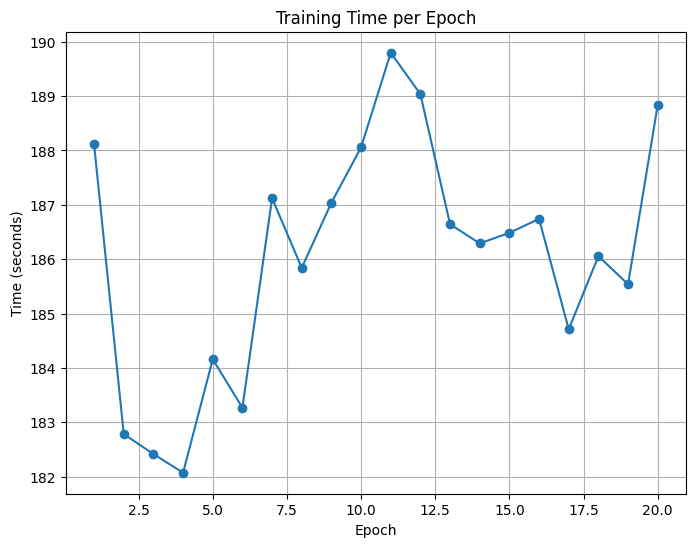

In [ ]:
import time
from keras.callbacks import Callback

# Custom callback to record training times after each epoch
class TrainingTimeCallback(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        elapsed_time = time.time() - self.start_time
        self.training_times.append(elapsed_time)
        print(f"Epoch {epoch + 1} - Training time: {elapsed_time:.2f} seconds")

    def on_train_begin(self, logs=None):
        self.training_times = []

# Create an instance of the custom callback
training_time_callback = TrainingTimeCallback()
# Train the model with augmented data
history2 = model2.fit(x_train_combined_padded,
                      train_y_combined,
                      batch_size=512,
                      epochs=20,
                      validation_data=(x_val_features, val_y1),callbacks=[training_time_callback])

# Plot the training times after each epoch as a line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), training_time_callback.training_times, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.title('Training Time per Epoch')
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss2, test_accuracy2 = model2.evaluate(x_test_features, test_y1)
print("Test Loss:", test_loss2)
print("Test Accuracy:", test_accuracy2)

262/262 [==============================] - 77s 293ms/step - loss: 0.2789 - accuracy: 0.9813
Test Loss: 0.278868705034256
Test Accuracy: 0.981279730796814


In [ ]:
def calculate_confusion_matrix2(actual, predicted):
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for a, p in zip(actual, predicted):
        if a == 1 and p == 1:
            tp += 1
        elif a == 0 and p == 0:
            tn += 1
        elif a == 0 and p == 1:
            fp += 1
        elif a == 1 and p == 0:
            fn += 1

    confusion_matrix = [[tp, fp], [fn, tn]]
    return confusion_matrix

# Make predictions using the trained model
test_predictions2 = model2.predict(x_test_features)
test_predictions2 = (test_predictions2 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Convert the predictions to a 1D array
test_predictions_flattened2 = test_predictions2.flatten()

# Convert the actual labels to a 1D array
test_y1_flattened = test_y1.flatten()
# Calculate confusion matrix
confusion_mat2 = calculate_confusion_matrix2(test_y1_flattened, test_predictions_flattened2)

print("Confusion Matrix:")
for row in confusion_mat2:
    print(row)


262/262 [==============================] - 78s 299ms/step
Confusion Matrix:
[2440, 1869]
[2257, 1792]


In [ ]:
# Extract values from the confusion matrix
tp2, fp2 = confusion_mat2[0]
fn2, tn2 = confusion_mat2[1]

# Calculate recall, precision, and F1-score
recall2 = tp2 / (tp2 + fn2)
precision2 = tp2 / (tp2 + fp2)
f1_score2 = 2 * (precision2 * recall2) / (precision2 + recall2)

print("Recall:", recall2)
print("Precision:", precision2)
print("F1-Score:", f1_score2)

# Calculate True Positive Rate (Recall)
tpr2 = tp2 / (tp2 + fn2)

# Calculate False Positive Rate
fpr2 = fp2 / (fp2 + tn2)

print("True Positive Rate (Recall):", tpr2)
print("False Positive Rate:", fpr2)


Recall: 0.5194805194805194
Precision: 0.5662566720816895
F1-Score: 0.5418609815678437
True Positive Rate (Recall): 0.5194805194805194
False Positive Rate: 0.5105162523900574


In [ ]:
from tensorflow.keras.layers import Dense, Input, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, Activation
from tensorflow.keras.models import Model

# Build the model with 1D CNN
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Embedding(max_feature, embed_size, input_length=max_len))
model3.add(tf.keras.layers.Conv1D(32, 5, activation='relu'))
model3.add(tf.keras.layers.GlobalMaxPooling1D())
model3.add(BatchNormalization())
model3.add(tf.keras.layers.Dense(8, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.4))
model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))


model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model3.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 2000, 100)         5000000   
                                                                 
 conv1d (Conv1D)             (None, 1996, 32)          16032     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 8)                 264       
                                                                 
 dropout_3 (Dropout)         (None, 8)                

Epoch 1/20
54/54 [==============================] - 20s 230ms/step - loss: 0.5565 - accuracy: 0.6848 - val_loss: 0.5878 - val_accuracy: 0.7828
Epoch 2/20
54/54 [==============================] - 12s 222ms/step - loss: 0.4199 - accuracy: 0.7577 - val_loss: 0.4492 - val_accuracy: 0.9715
Epoch 3/20
54/54 [==============================] - 11s 209ms/step - loss: 0.3885 - accuracy: 0.7628 - val_loss: 0.3391 - val_accuracy: 0.9860
Epoch 4/20
54/54 [==============================] - 12s 222ms/step - loss: 0.3777 - accuracy: 0.7642 - val_loss: 0.2381 - val_accuracy: 0.9896
Epoch 5/20
54/54 [==============================] - 11s 193ms/step - loss: 0.3721 - accuracy: 0.7662 - val_loss: 0.1542 - val_accuracy: 0.9904
Epoch 6/20
54/54 [==============================] - 11s 201ms/step - loss: 0.3686 - accuracy: 0.7657 - val_loss: 0.0936 - val_accuracy: 0.9909
Epoch 7/20
54/54 [==============================] - 10s 186ms/step - loss: 0.3662 - accuracy: 0.7651 - val_loss: 0.0571 - val_accuracy: 0.9901

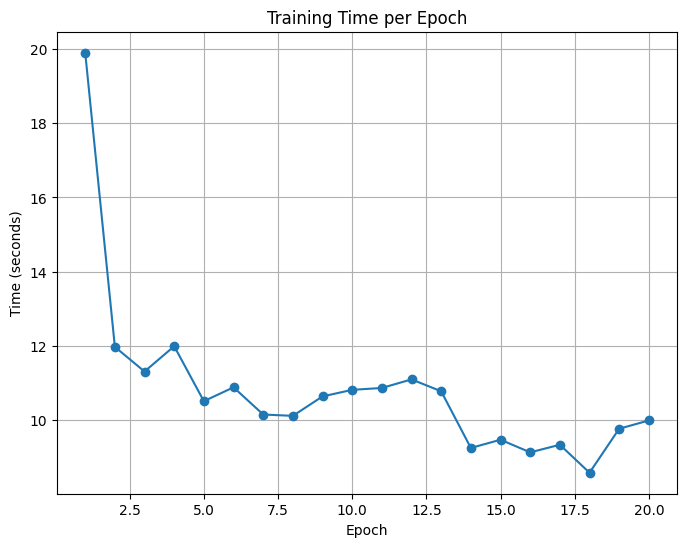

In [ ]:
import time
from keras.callbacks import Callback

# Custom callback to record training times after each epoch
class TrainingTimeCallback(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        elapsed_time = time.time() - self.start_time
        self.training_times.append(elapsed_time)
        print(f"Epoch {epoch + 1} - Training time: {elapsed_time:.2f} seconds")

    def on_train_begin(self, logs=None):
        self.training_times = []
# Train the model with augmented data
history3 = model3.fit(x_train_combined_padded,
                      train_y_combined,
                      batch_size=512,
                      epochs=20,
                      validation_data=(x_val_features, val_y1),callbacks=[training_time_callback])

# Plot the training times after each epoch as a line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), training_time_callback.training_times, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.title('Training Time per Epoch')
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss3, test_accuracy3 = model3.evaluate(x_test_features, test_y1)
print("Test Loss:", test_loss3)
print("Test Accuracy:", test_accuracy3)

262/262 [==============================] - 1s 4ms/step - loss: 0.0542 - accuracy: 0.9877
Test Loss: 0.05424318090081215
Test Accuracy: 0.9876765012741089


In [ ]:
def calculate_confusion_matrix3(actual, predicted):
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for a, p in zip(actual, predicted):
        if a == 1 and p == 1:
            tp += 1
        elif a == 0 and p == 0:
            tn += 1
        elif a == 0 and p == 1:
            fp += 1
        elif a == 1 and p == 0:
            fn += 1

    confusion_matrix = [[tp, fp], [fn, tn]]
    return confusion_matrix

# Make predictions using the trained model
test_predictions3 = model3.predict(x_test_features)
test_predictions3 = (test_predictions3 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Convert the predictions to a 1D array
test_predictions_flattened3 = test_predictions3.flatten()

# Convert the actual labels to a 1D array
test_y1_flattened = test_y1.flatten()
# Calculate confusion matrix
confusion_mat3 = calculate_confusion_matrix3(test_y1_flattened, test_predictions_flattened3)

print("Confusion Matrix:")
for row in confusion_mat3:
    print(row)


262/262 [==============================] - 4s 3ms/step
Confusion Matrix:
[2, 1]
[4695, 3660]


In [ ]:
# Extract values from the confusion matrix
tp3, fp3 = confusion_mat3[0]
fn3, tn3 = confusion_mat3[1]

# Calculate recall, precision, and F1-score
recall3 = tp3 / (tp3 + fn3)
precision3 = tp3 / (tp3 + fp3)
f1_score3 = 2 * (precision3 * recall3) / (precision3 + recall3)

print("Recall:", recall3)
print("Precision:", precision3)
print("F1-Score:", f1_score3)

# Calculate True Positive Rate (Recall)
tpr3 = tp3 / (tp3 + fn3)

# Calculate False Positive Rate
fpr3 = fp3 / (fp3 + tn3)

print("True Positive Rate (Recall):", tpr3)
print("False Positive Rate:", fpr3)


Recall: 0.0004258037044922291
Precision: 0.6666666666666666
F1-Score: 0.0008510638297872341
True Positive Rate (Recall): 0.0004258037044922291
False Positive Rate: 0.0002731494127287626


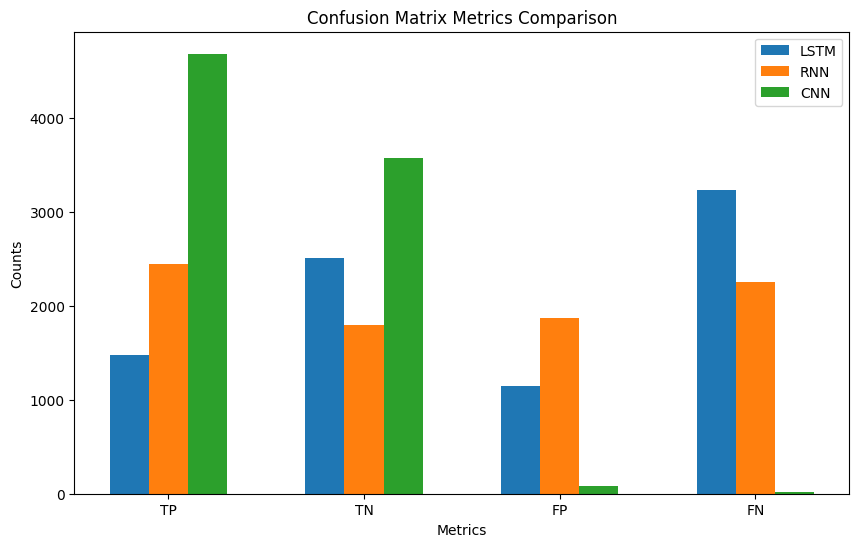

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Define the data for the confusion matrix
confusion_matrix_model1 = np.array([[1471, 1149], [3226, 2512]])
confusion_matrix_model2 = np.array([[2440, 1869], [2257, 1792]])
confusion_matrix_model3 = np.array([[4680, 86], [17, 3575]])

# Calculate TP, TN, FP, FN for each model
tp_model1, fp_model1 = confusion_matrix_model1[0]
fn_model1, tn_model1 = confusion_matrix_model1[1]

tp_model2, fp_model2 = confusion_matrix_model2[0]
fn_model2, tn_model2 = confusion_matrix_model2[1]

tp_model3, fp_model3 = confusion_matrix_model3[0]
fn_model3, tn_model3 = confusion_matrix_model3[1]

# Create labels for the bars
labels = ['TP', 'TN', 'FP', 'FN']

# Data for the bars
data_model1 = [tp_model1, tn_model1, fp_model1, fn_model1]
data_model2 = [tp_model2, tn_model2, fp_model2, fn_model2]
data_model3 = [tp_model3, tn_model3, fp_model3, fn_model3]

# Position of bars on x-axis
x = np.arange(len(labels))

# Width of the bars
width = 0.2

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - width, data_model1, width, label='LSTM')
plt.bar(x, data_model2, width, label='RNN')
plt.bar(x + width, data_model3, width, label='CNN')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Counts')
plt.title('Confusion Matrix Metrics Comparison')
plt.xticks(x, labels)
plt.legend()

# Show the plot
plt.show()



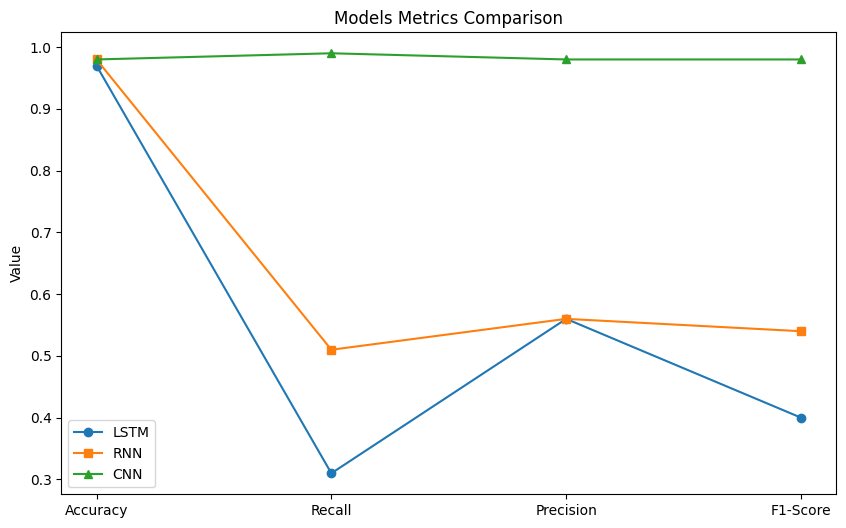

In [ ]:
import matplotlib.pyplot as plt

# Model names
model_names = ['LSTM', 'RNN', 'CNN']

# Metrics names
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score']

# Values for the metrics
metric_values_model_X = [0.97, 0.31, 0.56, 0.40]
metric_values_model_Y = [0.98, 0.51, 0.56, 0.54]
metric_values_model_Z = [0.98, 0.99, 0.98, 0.98]

# Symbols for each metric
symbols = ['o', 's', '^', 'd']

# Create the line plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines and symbols for each model
for i, model_name in enumerate(model_names):
    metric_values = [metric_values_model_X, metric_values_model_Y, metric_values_model_Z][i]
    plt.plot(metrics, metric_values, marker=symbols[i], linestyle='-', label=model_name)

# Add labels, title, and legend
plt.ylabel('Value')
plt.title('Models Metrics Comparison')
plt.legend()
plt.grid(False)
# Hide x-axis tick labels
plt.show()
